## Seasonal decomposition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
data_imp = pd.read_pickle('AmsData_measurements.pkl')
mydata = (data_imp.T * 1000).T
orig_x = np.load('orig_x.npy')
ans = pd.read_pickle('answers200.pkl')

In [3]:
mydata.T.index[-1]

datetime.date(2018, 1, 5)

In [4]:
# create the date index (all days with an 11-day interval)
full_dates = pd.DatetimeIndex(start=mydata.T.index[0], end=mydata.T.index[-1], freq='11D')

# interpolation of original data to the full dates index                        
data_interp = mydata.T.reindex(full_dates).interpolate(how='linear')

In [5]:
diffs = []
diffs = [x.days for x in np.diff(mydata.columns.values)]

In [8]:
ts_num = 50

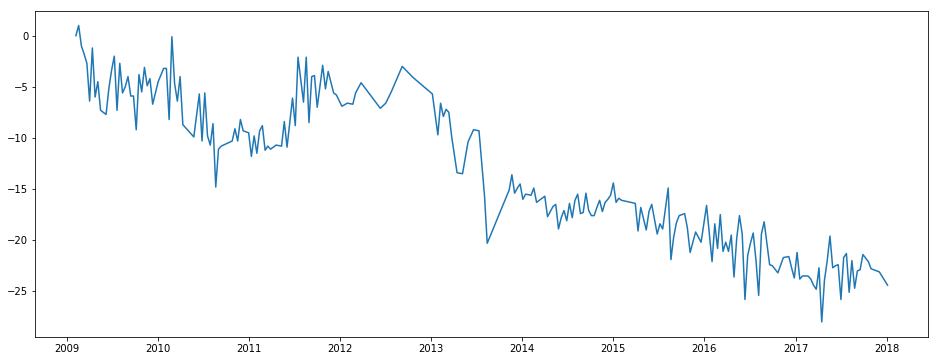

In [9]:
plt.figure(figsize=(16,6))
ax = plt.gca()
plt.plot(mydata.columns,mydata.iloc[ts_num,:])
for i in ans.points[ts_num]:
    ax.plot(mydata.columns[i], mydata.iloc[ts_num, i].T, 'o', markersize=3.5, linewidth=1, color='red')
plt.show()

In [10]:
ts = pd.DataFrame(mydata.iloc[ts_num,:])
ts.columns = ["defo"]
a = pd.to_datetime(ts.index)
ts.reset_index()
ts = ts.set_index(a)

In [11]:
# ts_int.index

In [12]:
ts_int = pd.DataFrame(data_interp.T.iloc[ts_num,:])
ts_int.columns = ["defo"]

In [13]:
decomposition = seasonal_decompose(ts_int.defo)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [14]:
fig=plt.figure(figsize=(16,20))
fig.suptitle("Time-series #"+str(ts_num), size = 18)
plt.subplot(411)
plt.plot(ts.defo, label='Original')
plt.grid(True)
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.grid(True)
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.grid(True)
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.grid(True)
plt.legend(loc='best')

fig.subplots_adjust(top=0.95)
plt.show()


In [16]:
adf_1 = adfuller(ts_int.defo)
adf_2 = adfuller(residual.dropna())
print('adf_1 (original):', adf_1)
print('adf_2 (residual):', adf_2)

adf_1 (original): (-0.6360977606283558, 0.8626150491471405, 13, 283, {'1%': -3.453670163592738, '5%': -2.8718077069772248, '10%': -2.5722411158835796}, 1127.9025946758475)
adf_2 (residual): (-11.443666834110552, 6.091904752301252e-21, 10, 280, {'1%': -3.453922368485787, '5%': -2.871918329081633, '10%': -2.5723001147959184}, 869.9426582150197)


In [34]:
trend

2009-02-05          NaN
2009-02-16          NaN
2009-02-27          NaN
2009-03-10    -3.742857
2009-03-21    -4.414286
2009-04-01    -4.000000
2009-04-12    -3.600000
2009-04-23    -2.700000
2009-05-04    -2.428571
2009-05-15    -2.842857
2009-05-26    -1.857143
2009-06-06    -0.657143
2009-06-17    -1.357143
2009-06-28    -1.100000
2009-07-09    -1.542857
2009-07-20    -2.514286
2009-07-31    -2.628571
2009-08-11    -1.985714
2009-08-22    -3.771429
2009-09-02    -3.671429
2009-09-13    -4.000000
2009-09-24    -4.085714
2009-10-05    -3.728571
2009-10-16    -3.200000
2009-10-27    -3.800000
2009-11-07    -3.057143
2009-11-18    -2.921429
2009-11-29    -2.778571
2009-12-10    -2.942857
2009-12-21    -3.785714
                ...    
2017-02-20   -17.900000
2017-03-03   -17.357143
2017-03-14   -17.171429
2017-03-25   -16.985714
2017-04-05   -17.342857
2017-04-16   -16.885714
2017-04-27   -16.242857
2017-05-08   -15.800000
2017-05-19   -15.642857
2017-05-30   -15.557143
2017-06-10   -14

In [13]:
ts_int.defo

2009-02-05     0.000000
2009-02-16     0.700000
2009-02-27    -0.200000
2009-03-10    -1.200000
2009-03-21     1.000000
2009-04-01    -1.900000
2009-04-12     0.000000
2009-04-23    -0.600000
2009-05-04     2.200000
2009-05-15     1.600000
2009-05-26     0.900000
2009-06-06     0.200000
2009-06-17     1.100000
2009-06-28     1.500000
2009-07-09     1.100000
2009-07-20    -5.000000
2009-07-31     4.400000
2009-08-11    -0.800000
2009-08-22     2.000000
2009-09-02    -0.200000
2009-09-13     1.300000
2009-09-24     0.700000
2009-10-05     0.300000
2009-10-16     0.500000
2009-10-27    -6.200000
2009-11-07     0.800000
2009-11-18    -0.600000
2009-11-29    -1.800000
2009-12-10    -1.300000
2009-12-21    -1.350000
                ...    
2017-02-20    -5.000000
2017-03-03    -6.500000
2017-03-14    -5.900000
2017-03-25    -6.700000
2017-04-05    -2.200000
2017-04-16    -7.000000
2017-04-27    -5.700000
2017-05-08   -11.100000
2017-05-19    -7.400000
2017-05-30    -3.700000
2017-06-10    -1